In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE/')
from utils import *

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [3]:
def change_config(load_dir, save_dir, key, value):
    with open(load_dir, 'r') as f:
        # config = yaml.safe_load(f)
        config = yaml.load(f, Loader=yaml.FullLoader)
        config[key] = value

    if save_dir is not None:
        with open(save_dir, 'w') as f:
            yaml.dump(config, f)

In [4]:
python_path = 'train_0514_valid.py'
saved_dir = 'saved/0521_ATAC/0521_091004'
config_path = f'{saved_dir}/config.yaml'

In [5]:
# config_path_valid = config_path.replace('config.yaml', 'config_valid.yaml')
# change_config(config_path, config_path_valid, 'selected_valid_datasets_idx', [0,1,2,3])

In [6]:
subprocess.run(
    f'python {python_path} --config_path {config_path}', 
    shell=True)

Traceback (most recent call last):
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/config.py", line 565, in configure
    handler = self.configure_handler(handlers[name])
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/config.py", line 746, in configure_handler
    result = factory(**kwargs)
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/handlers.py", line 155, in __init__
    BaseRotatingHandler.__init__(self, filename, mode, encoding=encoding,
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/handlers.py", line 58, in __init__
    logging.FileHandler.__init__(self, filename, mode=mode,
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/logging/__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
FileNotFoundError: [Errno 2] No such file or 

CompletedProcess(args='python train_0514_valid.py --config_path saved/0521_ATAC/0521_091004/config.yaml', returncode=1)

In [6]:
task_idx_list = np.load(f'{saved_dir}/task_idx_list.npy')
y_pred_list = np.load(f'{saved_dir}/y_pred_list.npy')
y_true_list = np.load(f'{saved_dir}/y_true_list.npy')
print(task_idx_list.shape, y_pred_list.shape, y_true_list.shape)

(8723,) (8723,) (8723,)


In [7]:
y_pred_0 = y_pred_list[np.where(task_idx_list==0)]
y_true_0 = y_true_list[np.where(task_idx_list==0)]
y_pred_1 = y_pred_list[np.where(task_idx_list==1)]
y_true_1 = y_true_list[np.where(task_idx_list==1)]
print(len(y_pred_0), len(y_true_0), len(y_pred_1), len(y_true_1))

y_pred_2 = y_pred_list[np.where(task_idx_list==2)]
y_true_2 = y_true_list[np.where(task_idx_list==2)]
y_pred_3 = y_pred_list[np.where(task_idx_list==3)]
y_true_3 = y_true_list[np.where(task_idx_list==3)]

print(len(y_pred_2), len(y_true_2), len(y_pred_3), len(y_true_3))

0 0 0 0
0 0 8723 8723


In [8]:
print(confusion_matrix(y_true_3, y_pred_3>0.5))
print(classification_report(y_true_3, y_pred_3>0.5))

[[2738  850]
 [1325 3810]]
              precision    recall  f1-score   support

         0.0       0.67      0.76      0.72      3588
         1.0       0.82      0.74      0.78      5135

    accuracy                           0.75      8723
   macro avg       0.75      0.75      0.75      8723
weighted avg       0.76      0.75      0.75      8723



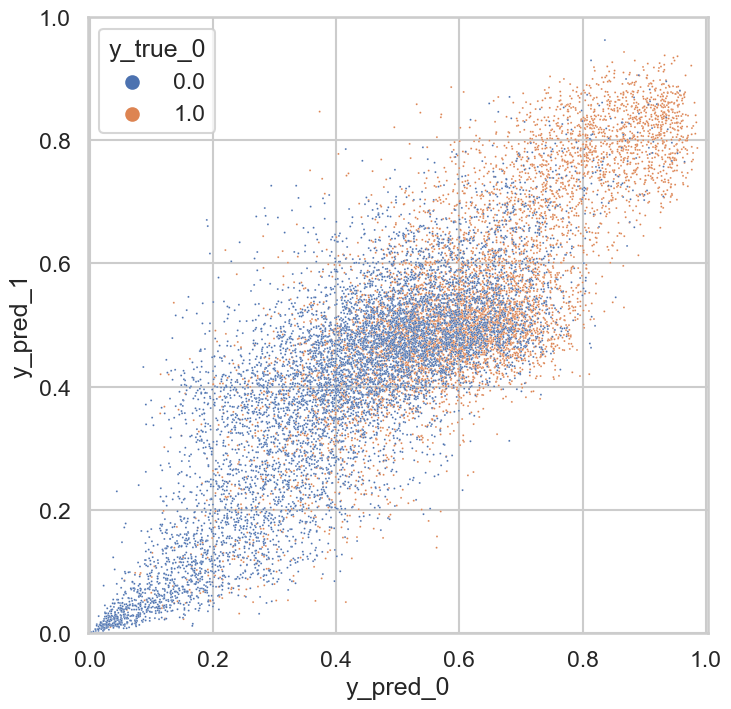

PearsonRResult(statistic=0.8513087269438874, pvalue=0.0)


In [8]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_0)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_0')
plt.savefig('figures/1.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

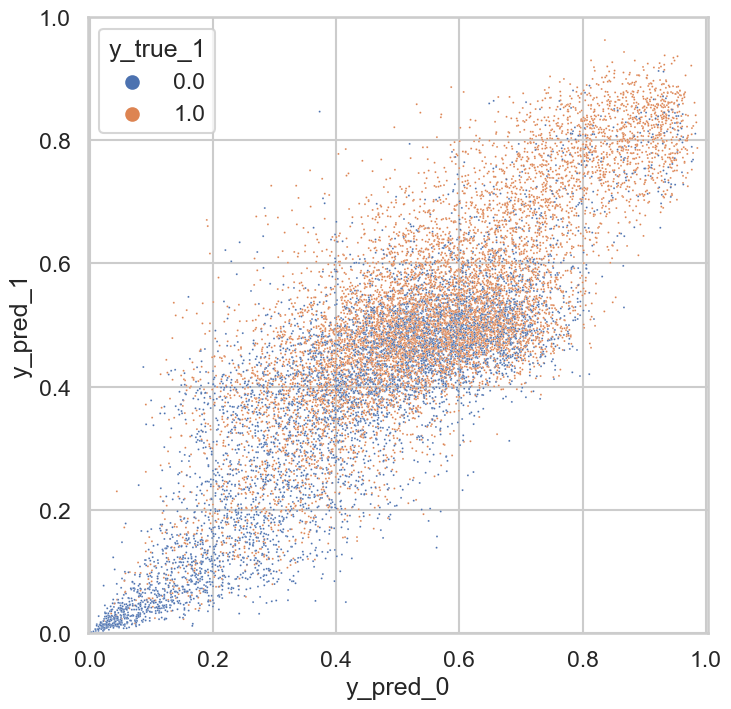

PearsonRResult(statistic=0.8513087269438874, pvalue=0.0)


In [9]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_1)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_1')
plt.savefig('figures/2.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

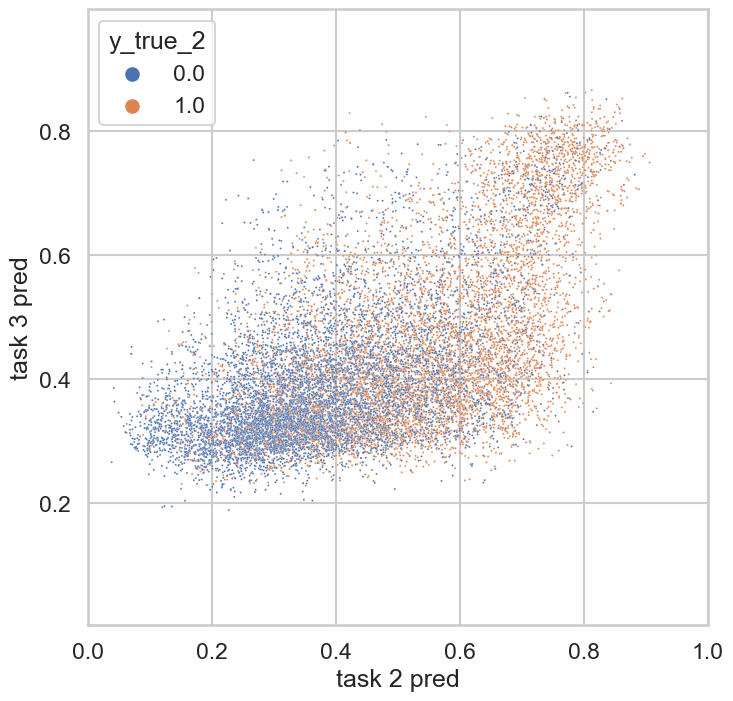

PearsonRResult(statistic=0.6040983512438027, pvalue=0.0)


In [10]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_2)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_2')
plt.savefig('figures/3.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

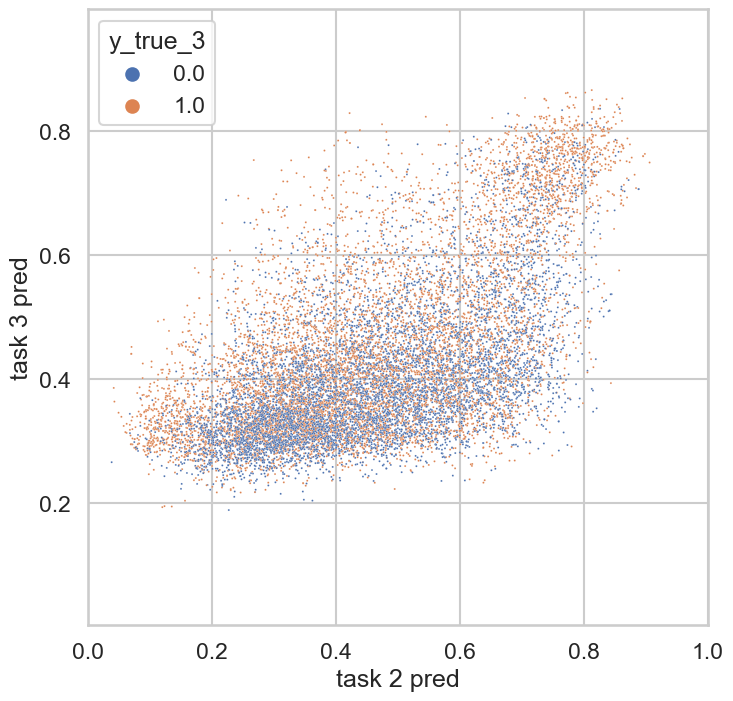

PearsonRResult(statistic=0.6040983512438027, pvalue=0.0)


In [11]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_3)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_3')
plt.savefig('figures/4.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

In [12]:
print(confusion_matrix(y_true_0, y_true_1))
print(confusion_matrix(y_pred_0>0.5, y_pred_1>0.5))

print(confusion_matrix(y_true_2, y_true_3))
print(confusion_matrix(y_pred_2>0.5, y_pred_3>0.5))

[[3202 5228]
 [2850 4084]]
[[6070  947]
 [3070 5277]]
[[2882 4179]
 [4044 4233]]
[[8182  892]
 [3478 2786]]


In [13]:
print(classification_report(y_true_0, y_pred_0>0.5))

              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70      8430
         1.0       0.64      0.77      0.70      6934

    accuracy                           0.70     15364
   macro avg       0.71      0.71      0.70     15364
weighted avg       0.71      0.70      0.70     15364



In [14]:
print(classification_report(y_true_1, y_pred_1>0.5))

              precision    recall  f1-score   support

         0.0       0.51      0.77      0.61      6052
         1.0       0.77      0.52      0.62      9312

    accuracy                           0.62     15364
   macro avg       0.64      0.64      0.62     15364
weighted avg       0.67      0.62      0.62     15364



In [15]:
print(classification_report(y_true_2, y_pred_2>0.5))

              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68      7061
         1.0       0.75      0.57      0.65      8277

    accuracy                           0.67     15338
   macro avg       0.68      0.67      0.67     15338
weighted avg       0.69      0.67      0.66     15338



In [16]:
print(classification_report(y_true_3, y_pred_3>0.5))

              precision    recall  f1-score   support

         0.0       0.49      0.82      0.61      6926
         1.0       0.66      0.29      0.40      8412

    accuracy                           0.53     15338
   macro avg       0.57      0.55      0.51     15338
weighted avg       0.58      0.53      0.50     15338

